# Zadanie

W celu ustalenia, czy dotychczasowa norma okresu użytkowania ubrań ochronnych -- wynosząca $150$ dni -- nie jest zbyt wysoka, zbadano faktyczny okres  użytkowania ich na przykładzie $65$ losowo wybranych robotników pracujących w normalnych warunkach. Otrzymano średnią długość okresu użytkowania $139$ dni oraz odchylenie standardowe ($S$) $9.8$ dni. Zakładając, że czas użytkowania ubrań ma rozkład normalny, stwierdzić, na poziomie istotności $\alpha = 0.01$, czy uzyskane wyniki stanowią podstawę do:

<ul>
<li> zmiany normy </li>
<li> zmniejszenia normy </li>
<li> zwiększenia normy </li>
</ul>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 4.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b>.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 > \mu_0
$$

W tym teście używa się statystyki

$$
t=\frac{\bar X - \mu_0}{S} \sqrt{n-1}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
[t(1-\alpha,n-1), +\infty)
$$

gdzie $t(\alpha,n)$ jest kwantylem rozkładu t--studenta przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$

## Model 5.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy \red{obu parametrach nieznanych}.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 < \mu_0
$$

W tym teście używa się statystyki

$$
t=\frac{\bar X - \mu_0}{S} \sqrt{n-1}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(-\infty, -t(1-\alpha,n-1)]
$$

gdzie $t(\alpha,n)$ jest kwantylem rozkładu t--studenta przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$

## Model 6

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy \red{obu parametrach nieznanych}.

Weryfikujemy hipotezę:

$$
H_{0}: \mu = \mu_0
$$

$$
H_{1}: \mu = \mu_1 \neq \mu_0
$$


W tym teście używa się statystyki
$$
t=\frac{\bar X - \mu_0}{S} \sqrt{n-1}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(-\infty, -t(1-\frac{1}{2}\alpha,n-1)] \cup [t(1-\frac{1}{2}\alpha,n-1), +\infty)
$$

gdzie $t(\alpha,n)$ jest kwantylem rozkładu t--studenta przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$

## Zdefiniujmy zmienną losową o rozkładzie t-Studenta

In [2]:
n=65
X=stats.t(n-1)

## Wyliczmy wartość statystyki

$$
t=\frac{\bar X - \mu_0}{S} \sqrt{n-1}
$$

In [3]:
alpha=0.01
bar_x = 139
mu=150
s = 9.8
t= (bar_x - mu)/s*np.sqrt(n-1)
print(mu)
print(bar_x)
print(s)
print(t)

150
139
9.8
-8.97959183673


# $H_0$: $\mu=150$ przy hipotezie alternatywnej $H_1$: $\mu <150$

## Wypisz przedział krytyczny

In [4]:
L=-np.infty

In [5]:
R=-X.ppf(1-alpha)

In [6]:
print(r'( %3.3f , %3.3f)' % (L,R))

( -inf , -2.386)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [7]:
if t < R:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0


## wylicz p-value

In [8]:
p = X.cdf(t)
print(p)

3.0698529309e-13


## zweryfikuj hipotezę na podstawie wartości p-value

In [9]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Odrzucam hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

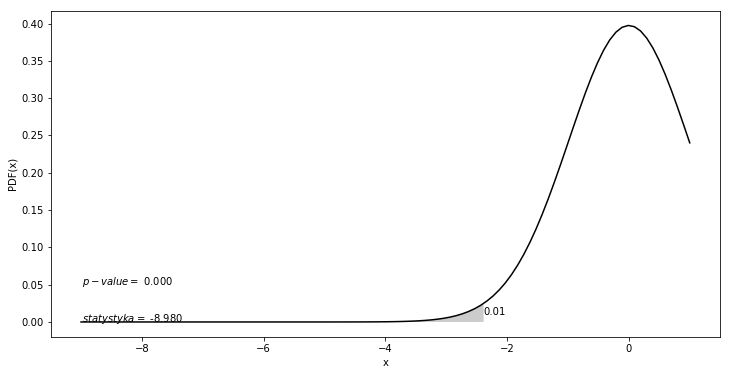

In [10]:
u_1=X.ppf(alpha)

x = np.linspace(-9,1,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-9, u_1)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.text(u_1, 0.01, np.round(X.cdf(u_1),4))
axs.vlines(t, 0, X.pdf(t), linestyles='--')
axs.text(t, 0, r'$statystyka = $ %.3f' % np.round(t,3))
axs.text(t, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\mu=150$ przy hipotezie alternatywnej $H_1$: $\mu > 150$
## Wypisz przedział krytyczny

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

## wylicz p-value

## zweryfikuj hipotezę na podstawie wartości p-value

Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

# $H_0$: $\mu=150$ przy hipotezie alternatywnej $H_1$: $\mu \neq 150$
## Wypisz przedział krytyczny

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

## wylicz p-value

## zweryfikuj hipotezę na podstawie wartości p-value

Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>